## in this project, i'll be trying to predict the housing prices with the help of tensorflow.

### firstly i'll import all the required libraries except for the sklearn and tensorflow ones, i'll import them as per the requirements

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
column_names = ['serial', 'date', 'age', 'distance', 'stores', 'latitude', 'longitude', 'price']


##### now i'll read the data frame using pandas and store it in the variable called df, the column names are pre-determined and assigned using the names parameter.

In [5]:
df=pd.read_csv('data.csv',names=column_names)
df.head()

,serial,date,age,distance,stores,latitude,longitude,price
0,0,2009,21,9,6,84,121,14264
1,1,2007,4,2,3,86,121,12032
2,2,2016,18,3,7,90,120,13560
3,3,2002,13,2,2,80,128,12029
4,4,2014,25,5,8,81,122,14157


##### now ill check for missing data, in real world problems, we are very likely to come across datasets with missing data.

In [13]:
df.isnull().sum()

serial       0
date         0
age          0
distance     0
stores       0
latitude     0
longitude    0
price        0
dtype: int64

##### as serial column just denotes the serial number, it has no effect on the target variable, we can drop it.

In [14]:
df.drop('serial',axis=1,inplace=True)

##### lets move on to differentiating the independant variables from the dependant.

##### as the target (independant) variable is price, we separate it from the data frame and store it as y, and the rest of the data frame consisting of all the independant variables are stored as X.

In [15]:
X=df.drop('price',axis=1).values

In [16]:
y=df['price'].values

##### lets standardize the data now, we are not to standardize the target variable. i will use MinMaxScaler for the task

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler()

In [20]:
X=scaler.fit_transform(X)

##### our data is standardized now, lets proceed to split our data into training and testing data

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2)

##### now we will build are neural networks model

In [24]:
from tensorflow.keras.models import Sequential

In [25]:
from tensorflow.keras.layers import Dense,Activation

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

In [27]:
model=Sequential()

In [28]:
#input layer
model.add(Dense(10,activation='relu'))

#hidden layer
model.add(Dense(20,activation='relu'))
model.add(Dense(5,activation='relu'))

#output layer
model.add(Dense(1))

#compile
model.compile(optimizer='adam',loss='mse')


##### our model is built now, lets fit the training data into it

In [30]:
early_stop=EarlyStopping(monitor='val_loss',patience=5,verbose=2)

In [31]:
model.fit(X_train,y_train,epochs=100,callbacks=[early_stop],verbose=3,validation_data=(X_test,y_test))
                                                                                    

Epoch 1/100
Epoch 2/100
Epoch 3/100
Epoch 4/100
Epoch 5/100
Epoch 6/100
Epoch 7/100
Epoch 8/100
Epoch 9/100
Epoch 10/100
Epoch 11/100
Epoch 12/100
Epoch 13/100
Epoch 14/100
Epoch 15/100
Epoch 16/100
Epoch 17/100
Epoch 18/100
Epoch 19/100
Epoch 20/100
Epoch 21/100
Epoch 22/100
Epoch 23/100
Epoch 24/100
Epoch 25/100
Epoch 26/100
Epoch 27/100
Epoch 28/100
Epoch 29/100
Epoch 30/100
Epoch 31/100
Epoch 32/100
Epoch 33/100
Epoch 34/100
Epoch 35/100
Epoch 36/100
Epoch 37/100
Epoch 38/100
Epoch 39/100
Epoch 40/100
Epoch 41/100
Epoch 42/100
Epoch 43/100
Epoch 44/100
Epoch 45/100
Epoch 46/100
Epoch 47/100
Epoch 48/100
Epoch 49/100
Epoch 50/100
Epoch 51/100
Epoch 52/100
Epoch 53/100
Epoch 54/100
Epoch 55/100
Epoch 56/100
Epoch 57/100
Epoch 58/100
Epoch 59/100
Epoch 60/100
Epoch 61/100
Epoch 62/100
Epoch 63/100
Epoch 64/100
Epoch 65/100
Epoch 66/100
Epoch 67/100
Epoch 68/100
Epoch 69/100
Epoch 70/100
Epoch 71/100
Epoch 72/100
Epoch 73/100
Epoch 74/100
Epoch 75/100
Epoch 76/100
Epoch 77/100
Epoch 78

##### our model is trained, lets visualise its performance 

In [33]:
loss=model.history.history

In [34]:
losses=pd.DataFrame(loss)
losses

,loss,val_loss
0,1.942112e+08,1.934228e+08
1,1.908895e+08,1.861343e+08
2,1.763085e+08,1.626073e+08
3,1.415336e+08,1.163347e+08
4,8.726598e+07,5.823572e+07
...,...,...
79,1.712242e+05,1.692602e+05
80,1.702113e+05,1.681677e+05
81,1.708734e+05,1.684779e+05
82,1.706739e+05,1.681415e+05


<Figure size 864x576 with 0 Axes>

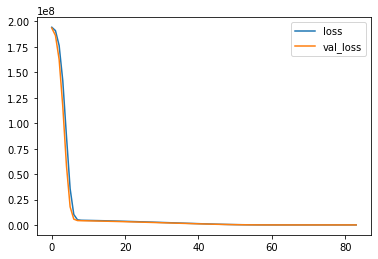

In [36]:
plt.figure(figsize=(12,8))
losses.plot()

##### this is perfect behaviour, we have trained our model well, lets get the predictions now.

In [37]:
y_hat=model.predict(X_test)

##### lets plot a scatter plot between y_test,y_hat(original and the predicted data)

In [46]:
y_hat=y_hat.reshape(1000,)

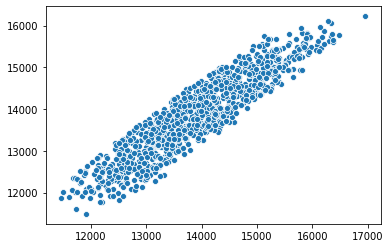

In [48]:
sns.scatterplot(y_test,y_hat)

##### this shows linearity, lets evalute our model using MAE,MSE and RMSE.

In [49]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [57]:
print('MAE:',mean_absolute_error(y_test,y_hat))
print('MSE:',mean_squared_error(y_test,y_hat))
print('RMSE:',np.sqrt(mean_squared_error(y_test,y_hat)))

MAE: 350.0289482421875
MSE: 168786.17051761915
RMSE: 410.835941122024


##### we can see that the evaluation results are pretty good, the RMSE is just 410 rupees which in terms of housing prices is remarkably good, lets test it on new data:

In [89]:
new=df.drop('price',axis=1).iloc[1]

In [90]:
new = scaler.fit_transform(new.values.reshape(-1, 6))

In [91]:
new=scaler.fit_transform(new)

In [92]:
pred_new=model.predict(new)

In [93]:
pred_new

array([[11433.622]], dtype=float32)

In [95]:
df.iloc[1]['price']

12032

##### we can see that it predicted the price as 11433 whereas the original price was 12032, this can be considered good.